NAME = SHYAM KUMAR RAJPOOT

COURSE = MCA

DOMAIN = DATA SCIENCE

TASK = UNEMPLOYMENT ANALYSIS WITH PYTHON

Batch - MAY Phase 2 AICTE OIB-SIP 2024

In [1]:
# import usefull libraries for manipulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as nlp
import matplotlib.pyplot as plt
import datetime as dt
import calendar
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline


# for training,selecting,and Evaluating
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings

In [2]:
df = pd.read_csv('/content/sample_data/Unemployment in India.csv')
df_2020 = pd.read_csv('/content/sample_data/Unemployment_Rate_upto_11_2020.csv')

In [3]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_2020

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


Labour Force Participatiom Rate(%) = (Labour Force / Working-Age Population) * 100

Estimated Unemployment Rate(%) = (Number of Unemployed / Labour Force) *100

In [7]:
df.shape

(768, 7)

In [8]:
df_2020.shape

(267, 9)

In [9]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [10]:
df_2020.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [11]:
# Checking Null Values
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [12]:
df_2020.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [15]:
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [16]:
df.shape

(740, 7)

In [17]:
df.duplicated().sum()

0

In [18]:
df_2020.duplicated().sum()

0

In [19]:
# renaming all column name for better understanding
df.columns = ['State', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Area' ]

In [20]:
df.columns

Index(['State', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Area'],
      dtype='object')

In [21]:
df_2020.columns = ['State', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']

In [22]:
df_2020.columns

Index(['State', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'longitude', 'latitude'],
      dtype='object')

In [23]:
df.head(5)

,State,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [24]:
df_2020.head(5)

,State,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [25]:
# State for highest unemployment
df['State'].value_counts().idxmax()

'Andhra Pradesh'

In [26]:
df['State'].value_counts()

State
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

In [27]:
df['State'].value_counts().idxmin()

'Chandigarh'

In [28]:
df_2020['State'].value_counts().idxmax()

'Andhra Pradesh'

In [29]:
df_2020['State'].value_counts().idxmin()

'Sikkim'

In [30]:
# month of unemployment
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['month_int'] = df['Date'].dt.month
df['month']= df['month_int'].apply(lambda x: calendar.month_abbr[x])

In [31]:
df_2020['Date']= pd.to_datetime(df_2020['Date'], dayfirst=True)
df_2020['month_int'] = df_2020['Date'].dt.month
df_2020['month']= df_2020['month_int'].apply(lambda x: calendar.month_abbr[x])

In [32]:
df['month'].value_counts().idxmax()

'May'

In [33]:
df_2020['month'].value_counts().idxmax()

'Mar'

In [34]:
# Month for lowest unemployment
df['month'].value_counts().idxmin()

'Apr'

In [35]:
df_2020['month'].value_counts().idxmin()

'Jan'

In [36]:
df.head(5)

,State,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,month_int,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,Sep


In [37]:
df_2020.head(5)

,State,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,month_int,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [38]:
df.drop(columns=['Frequency', 'month_int'])

,State,Date,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area,month
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,May
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,Jun
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,Jul
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,Aug
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,Sep
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,7.55,10871168.0,44.09,Urban,Feb
750,West Bengal,2020-03-31,6.67,10806105.0,43.34,Urban,Mar
751,West Bengal,2020-04-30,15.63,9299466.0,41.20,Urban,Apr
752,West Bengal,2020-05-31,15.22,9240903.0,40.67,Urban,May


In [39]:
df_2020.drop(columns=['Frequency', 'month_int'])

,State,Date,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,month
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,15.9129,79.740,Jan
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,15.9129,79.740,Feb
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,South,15.9129,79.740,Mar
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,South,15.9129,79.740,Apr
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,South,15.9129,79.740,May
...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,7.29,30726310,40.39,East,22.9868,87.855,Jun
263,West Bengal,2020-07-31,6.83,35372506,46.17,East,22.9868,87.855,Jul
264,West Bengal,2020-08-31,14.87,33298644,47.48,East,22.9868,87.855,Aug
265,West Bengal,2020-09-30,9.35,35707239,47.73,East,22.9868,87.855,Sep


In [40]:
df1 = df[['State', 'Estimated Unemployment Rate']].groupby('State').sum().sort_values('Estimated Unemployment Rate', ascending=False)

In [41]:
df1_2020 = df_2020[['State', 'Estimated Unemployment Rate']].groupby('State').sum().sort_values('Estimated Unemployment Rate', ascending=False)

In [42]:
df1.head(10)

,Estimated Unemployment Rate
State,
Tripura,793.81
Haryana,735.93
Jharkhand,576.38
Bihar,529.71
Himachal Pradesh,519.13
Delhi,461.87
Rajasthan,393.63
Uttar Pradesh,351.44
Jammu & Kashmir,339.96


In [43]:
df1_2020.head(10)

,Estimated Unemployment Rate
State,
Haryana,274.77
Tripura,250.55
Jharkhand,195.39
Bihar,194.71
Delhi,184.14
Puducherry,179.42
Himachal Pradesh,160.65
Rajasthan,158.68
Jammu & Kashmir,148.30


-------------------------------------------------------Visualization-------------------------------------------------

Text(0, 0.5, 'Number of people unemployment %')

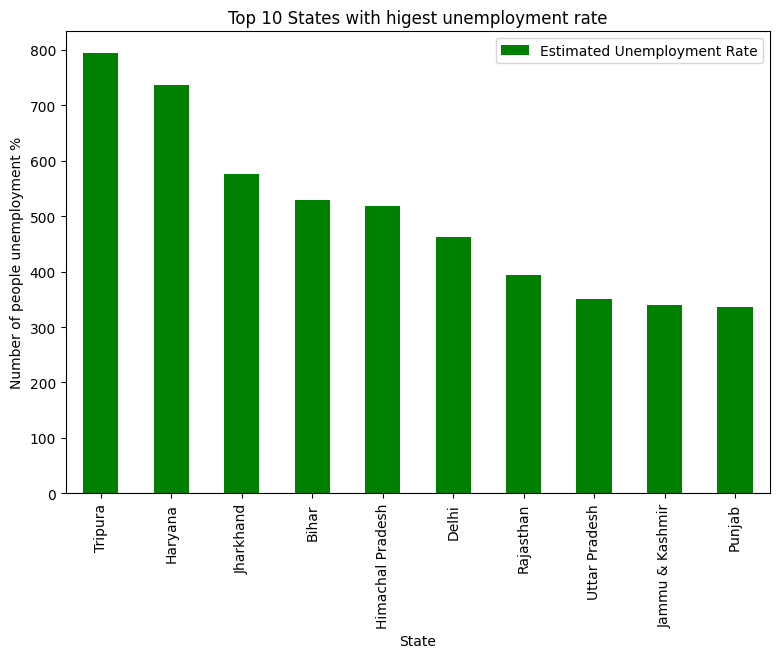

In [44]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
df1[:10].plot(kind= 'bar', color='green', figsize=(20,6), ax=ax0)
ax0.set_title('Top 10 States with higest unemployment rate')
ax0.set_xlabel('State')
ax0.set_ylabel( 'Number of people unemployment %')

Text(0, 0.5, 'Number of people unemployment %')

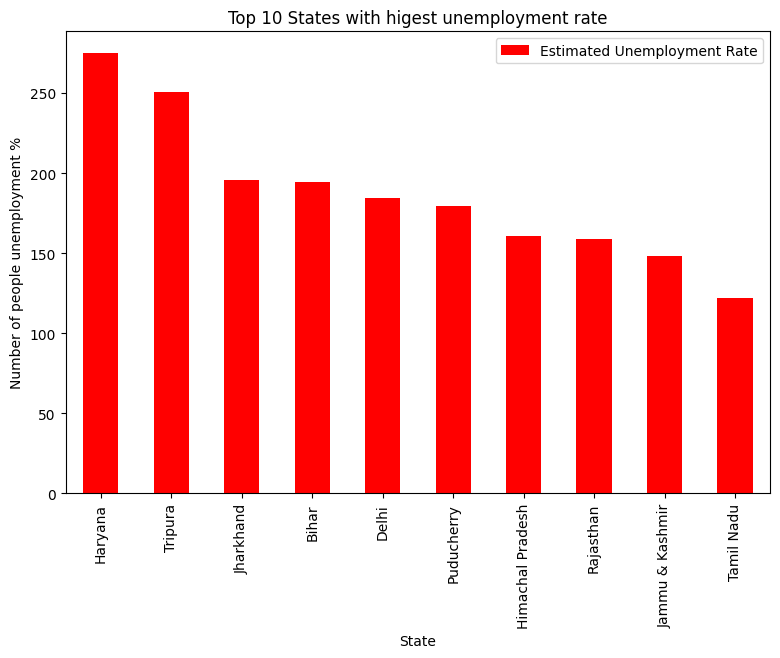

In [45]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
df1_2020[:10].plot(kind= 'bar', color='red', figsize=(20,6), ax=ax0)
ax0.set_title('Top 10 States with higest unemployment rate')
ax0.set_xlabel('State')
ax0.set_ylabel( 'Number of people unemployment %')

In [46]:
# for Highest unemployment
df2 = df[['month', 'Estimated Unemployment Rate']].groupby('month').sum().sort_values('Estimated Unemployment Rate', ascending=False)

In [47]:
df2.head(10)

,Estimated Unemployment Rate
month,
May,1747.85
Apr,1205.72
Jun,1097.56
Mar,556.43
Oct,544.55
Nov,542.76
Feb,528.13
Jan,527.39
Aug,510.81


In [48]:
df2_2020 = df_2020[['month', 'Estimated Unemployment Rate']].groupby('month').sum().sort_values('Estimated Unemployment Rate', ascending=False)

In [49]:
df2_2020.head(10)

,Estimated Unemployment Rate
month,
May,627.60
Apr,578.14
Jun,294.60
Mar,291.13
Aug,278.46
Jul,265.53
Feb,240.92
Jan,239.11
Sep,235.06


Text(0, 0.5, 'Number of people unemployment %')

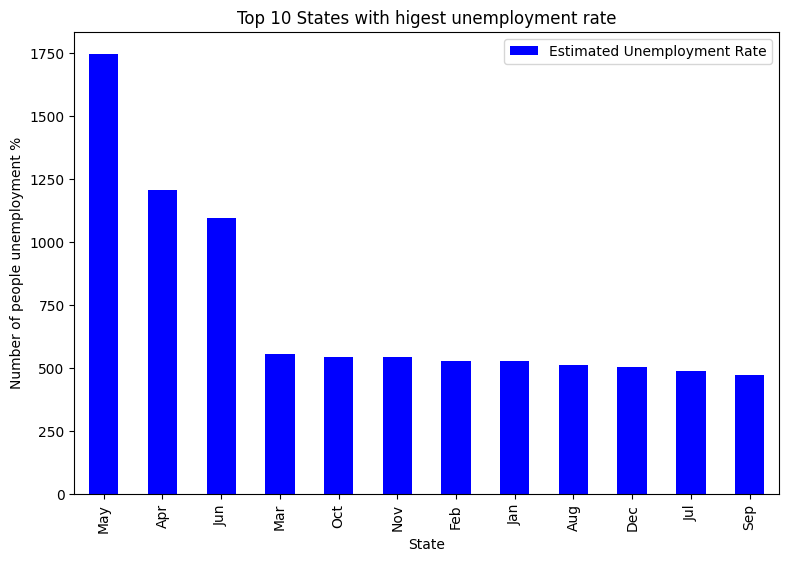

In [50]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
df2[:12].plot(kind= 'bar',  color= 'blue', figsize=(20,6), ax=ax0)
ax0.set_title('Top 10 States with higest unemployment rate')
ax0.set_xlabel('State')
ax0.set_ylabel( 'Number of people unemployment %')

Text(0, 0.5, 'Number of people unemployment %')

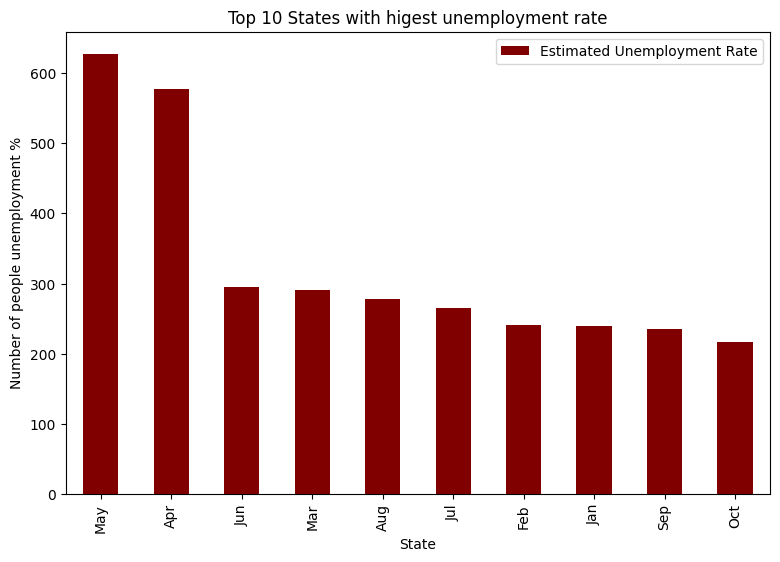

In [51]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
df2_2020[:10].plot(kind= 'bar', color='maroon', figsize=(20,6), ax=ax0)
ax0.set_title('Top 10 States with higest unemployment rate')
ax0.set_xlabel('State')
ax0.set_ylabel( 'Number of people unemployment %')

In [52]:
# visualizing labour participation and unemployment rate for each mont
df_EEE = df.groupby(['month'])[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].mean()
df_EEE = pd.DataFrame(df_EEE).reset_index()
month = df_EEE.month
unemployment_rate = df_EEE['Estimated Unemployment Rate']
labor_participation_rate = df_EEE['Estimated Labour Participation Rate']

fig = go.Figure()


In [53]:
fig.add_trace(go.Bar(x=month, y=unemployment_rate, name='Unempployment_Rate'))
fig.add_trace(go.Bar(x=month, y=labor_participation_rate, name='Labor Participation Rate'))
fig.update_layout(title='Unemployment Rate and Labor Participation Rate', xaxis={'categoryorder': 'array', 'categoryarray': [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']})
fig.show()

In [54]:
df_EEE_2020 = df.groupby(['month'])[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']].mean()
df_EEE_2020 = pd.DataFrame(df_EEE_2020).reset_index()
month = df_EEE_2020.month
unemployment_rate = df_EEE_2020['Estimated Unemployment Rate']
labor_participation_rate = df_EEE_2020['Estimated Labour Participation Rate']

fig = go.Figure()

In [55]:
fig.add_trace(go.Bar(x=month, y=unemployment_rate, name='Unempployment_Rate'))
fig.add_trace(go.Bar(x=month, y=labor_participation_rate, name='Labor Participation Rate'))
fig.update_layout(title='Unemployment Rate and Labor Participation Rate', xaxis={'categoryorder': 'array', 'categoryarray': [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']})
fig.show()

In [56]:
# Estimated Employment State Wise
df3 = df[['State', 'Estimated Employed']].groupby('State').sum().sort_values('Estimated Employed', ascending=False)

In [57]:
df3

,Estimated Employed
State,
Uttar Pradesh,786655301.0
Maharashtra,559725484.0
West Bengal,481559064.0
Bihar,346253296.0
Tamil Nadu,343547309.0
Gujarat,319256358.0
Madhya Pradesh,311233561.0
Karnataka,298679340.0
Rajasthan,281149813.0


Text(0, 0.5, 'Number of Estimated Employed')

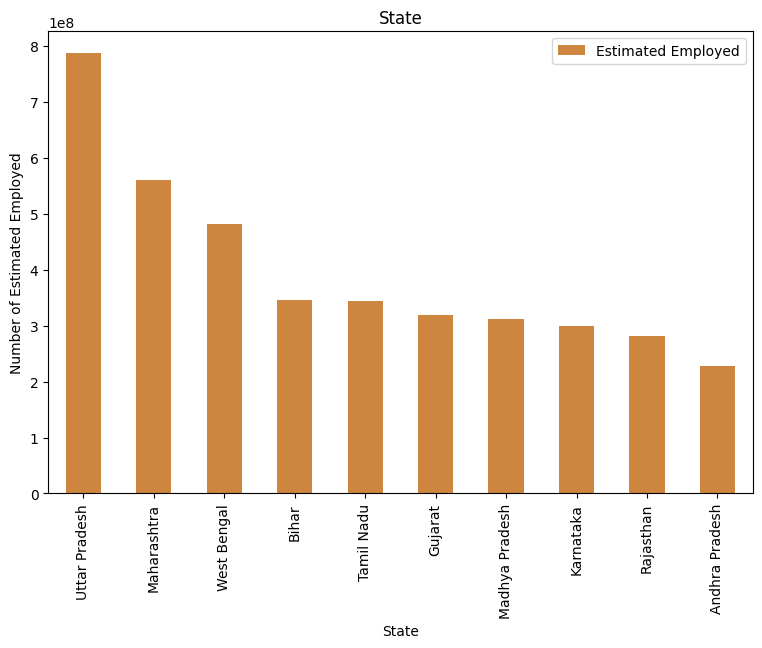

In [58]:
# State Wise Employed visualization
df3 = df[['State', 'Estimated Employed']].groupby('State').sum().sort_values('Estimated Employed', ascending=False)
df3.head(10)
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)

df3[:10].plot(kind='bar', color='peru', figsize=(20,6), ax=ax1)
ax1.set_title('Estimated Employed people in each state')
ax1.set_title('State')
ax1.set_ylabel('Number of Estimated Employed')

In [59]:
# State wise unemployment Rate
# Estimated Unemployment Rate (%) = ( N0 of emp/ Labor Force)* 100
df3_b = df[['State', 'Estimated Unemployment Rate']].groupby('State').sum().sort_values('Estimated Unemployment Rate', ascending=False)

In [60]:
df3_b

,Estimated Unemployment Rate
State,
Tripura,793.81
Haryana,735.93
Jharkhand,576.38
Bihar,529.71
Himachal Pradesh,519.13
Delhi,461.87
Rajasthan,393.63
Uttar Pradesh,351.44
Jammu & Kashmir,339.96


Text(0, 0.5, ' Estimated Unemployment Rate (in %)')

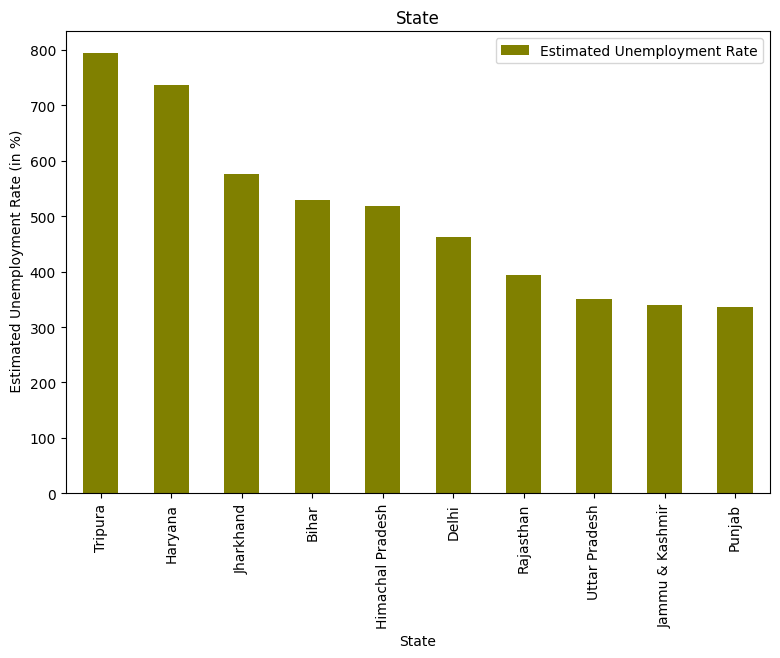

In [61]:
# Visualization for Unemployement Rate State Wise
df3_b= df[['State', 'Estimated Unemployment Rate']].groupby('State').sum().sort_values('Estimated Unemployment Rate', ascending=False)
df3_b.head(10)
fig=plt.figure()
ax1=fig.add_subplot(1,2,2)

df3_b[:10].plot(kind='bar', color='olive', figsize=(20,6), ax=ax1)
ax1.set_title('Estimated Unemployment rate in each state')
ax1.set_title('State')
ax1.set_ylabel(' Estimated Unemployment Rate (in %)')

In [62]:
df3_b_2020 = df_2020[['State', 'Estimated Unemployment Rate']].groupby('State').sum().sort_values('Estimated Unemployment Rate', ascending=False)

In [63]:
df3_b_2020

,Estimated Unemployment Rate
State,
Haryana,274.77
Tripura,250.55
Jharkhand,195.39
Bihar,194.71
Delhi,184.14
Puducherry,179.42
Himachal Pradesh,160.65
Rajasthan,158.68
Jammu & Kashmir,148.30


Text(0, 0.5, ' Estimated Unemployment Rate (in %)')

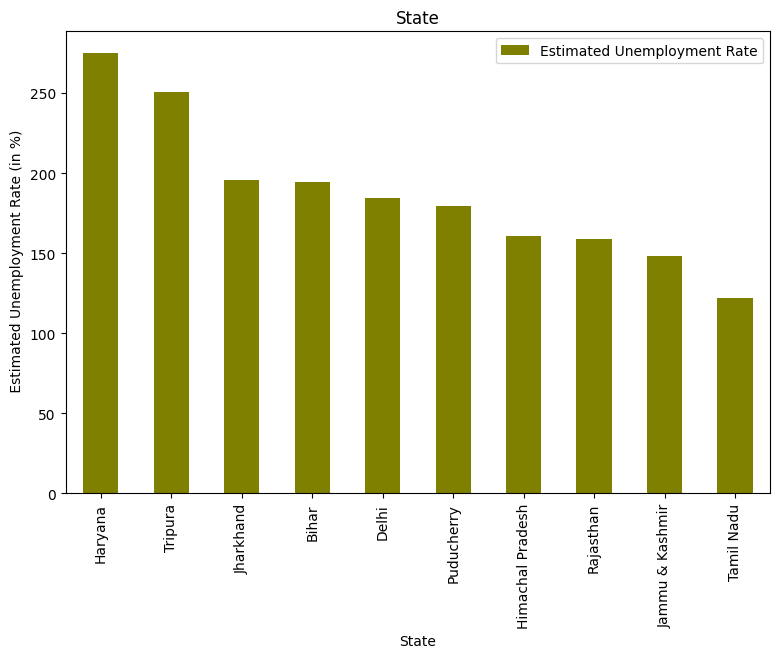

In [64]:
# Visualization for Unemployement Rate State Wise
df3_b_2020= df_2020[['State', 'Estimated Unemployment Rate']].groupby('State').sum().sort_values('Estimated Unemployment Rate', ascending=False)
df3_b_2020.head(10)
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)

df3_b_2020[:10].plot(kind='bar', color='olive', figsize=(20,6), ax=ax0)
ax0.set_title('Estimated Unemployment rate in each state')
ax0.set_title('State')
ax0.set_ylabel(' Estimated Unemployment Rate (in %)')

In [65]:
# Estimated Employed State Wise
df3_2020 = df_2020[['State', 'Estimated Employed']].groupby('State').sum().sort_values('Estimated Employed', ascending=False)

In [66]:
df3_2020

,Estimated Employed
State,
Uttar Pradesh,555247990
Maharashtra,392047582
West Bengal,333051643
Bihar,236068280
Gujarat,227307461
Madhya Pradesh,223183353
Tamil Nadu,219878981
Karnataka,216240176
Rajasthan,197317522


Text(0, 0.5, 'Number of Estimated Employed')

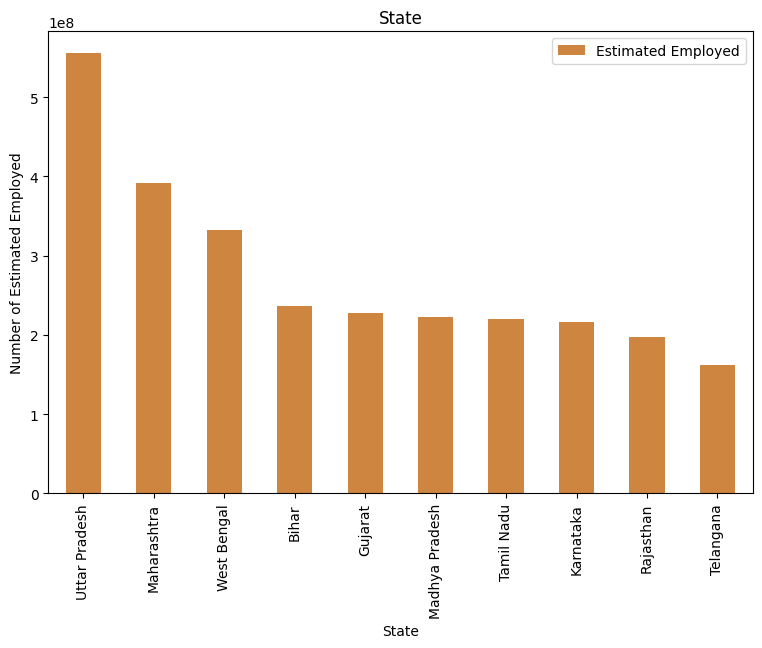

In [67]:
# State Wise Estimated Employed visualization
df3_2020 = df_2020[['State', 'Estimated Employed']].groupby('State').sum().sort_values('Estimated Employed', ascending=False)
df3_2020.head(10)
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)

df3_2020[:10].plot(kind='bar', color='peru', figsize=(20,6), ax=ax0)
ax0.set_title('Estimated Employed people in each state')
ax0.set_title('State')
ax0.set_ylabel('Number of Estimated Employed')

In [68]:
df4 =df[['month', 'Estimated Employed']].groupby('month').sum().sort_values('Estimated Employed', ascending=False)


In [69]:
df4

,Estimated Employed
month,
Jun,766717078.0
May,699995530.0
Jan,406899254.0
Feb,403011803.0
Sep,402452126.0
Oct,401411032.0
Nov,400051335.0
Jul,399838967.0
Aug,399610205.0


Text(0, 0.5, 'Number of Estimated Employed')

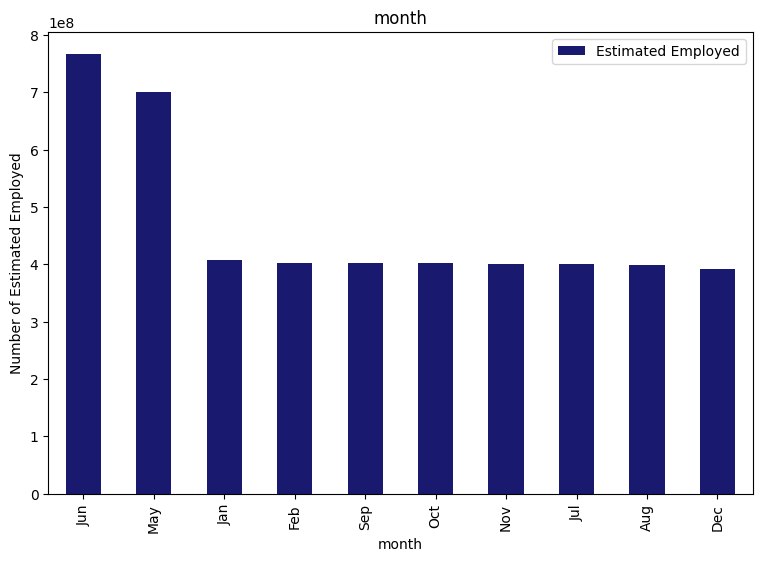

In [70]:
# Estimated employed month wise
df4 = df[['month', 'Estimated Employed']].groupby('month').sum().sort_values('Estimated Employed', ascending=False)
df4.head(10)
fig=plt.figure()
ax1=fig.add_subplot(1,2,2)

df4[:10].plot(kind='bar', color='midnightblue', figsize=(20,6), ax=ax1)
ax1.set_title('Estimated Employed people in each state')
ax1.set_title('month')
ax1.set_ylabel('Number of Estimated Employed')

In [71]:
df4_2020 =df_2020[['month', 'Estimated Employed']].groupby('month').sum().sort_values('Estimated Employed', ascending=False)

In [72]:
df4_2020

,Estimated Employed
month,
Jan,406567194
Feb,402694917
Sep,393871643
Oct,393659474
Mar,392543817
Aug,389584135
Jul,389286580
Jun,374149633
May,310699661


Text(0, 0.5, 'Number of Estimated Employed')

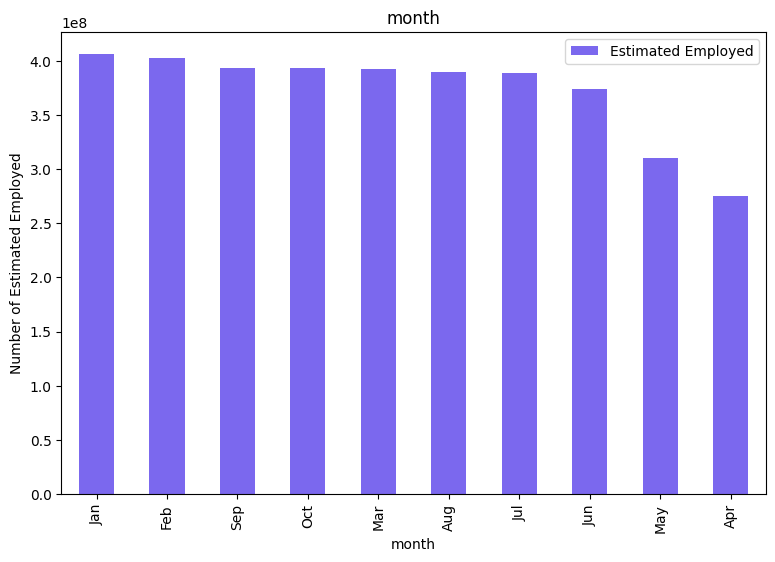

In [73]:
# Estimated employed month wise
df4_2020 = df_2020[['month', 'Estimated Employed']].groupby('month').sum().sort_values('Estimated Employed', ascending=False)
df4_2020.head(10)
fig=plt.figure()
ax1=fig.add_subplot(1,2,2)

df4_2020[:10].plot(kind='bar', color='mediumslateblue', figsize=(20,6), ax=ax1)
ax1.set_title('Estimated Employed people in each state')
ax1.set_title('month')
ax1.set_ylabel('Number of Estimated Employed')

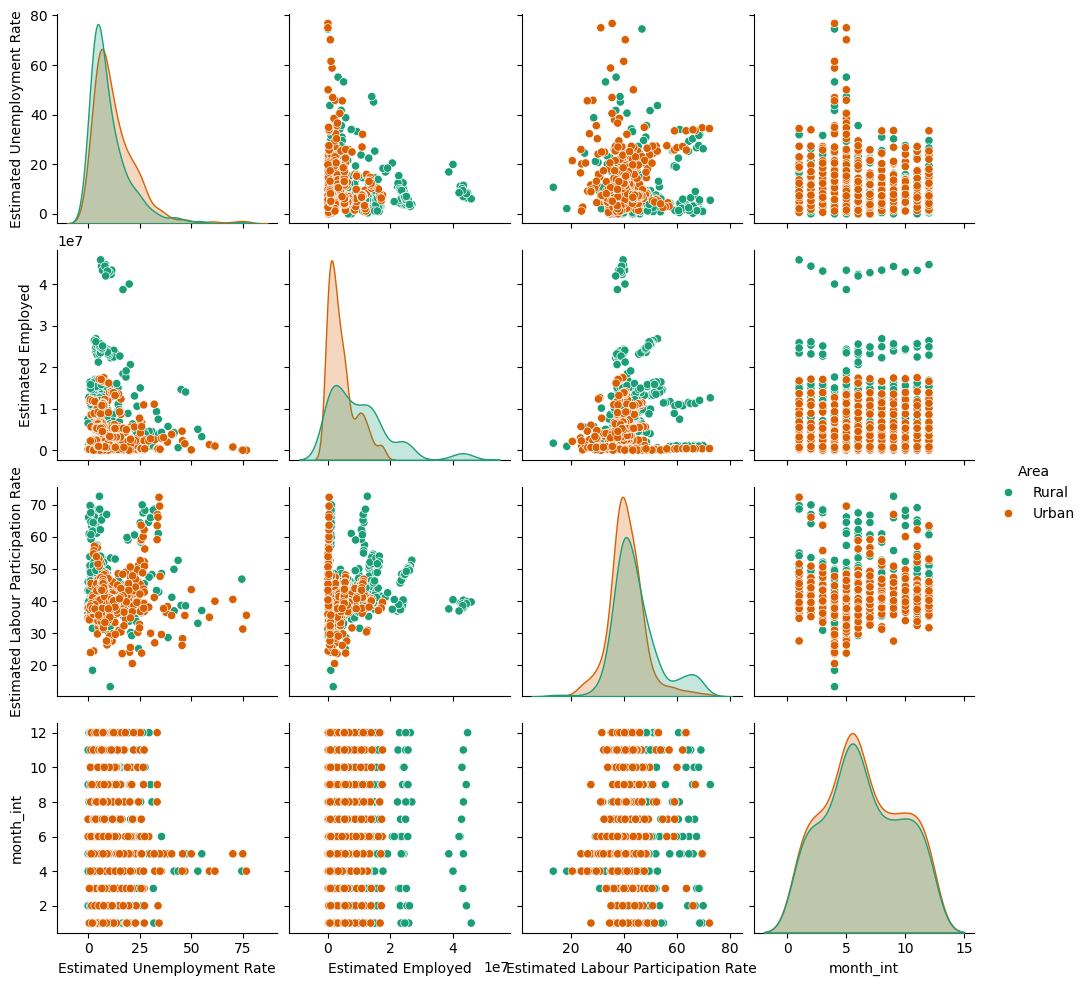

In [74]:
sns.pairplot(df, hue='Area', palette='Dark2')

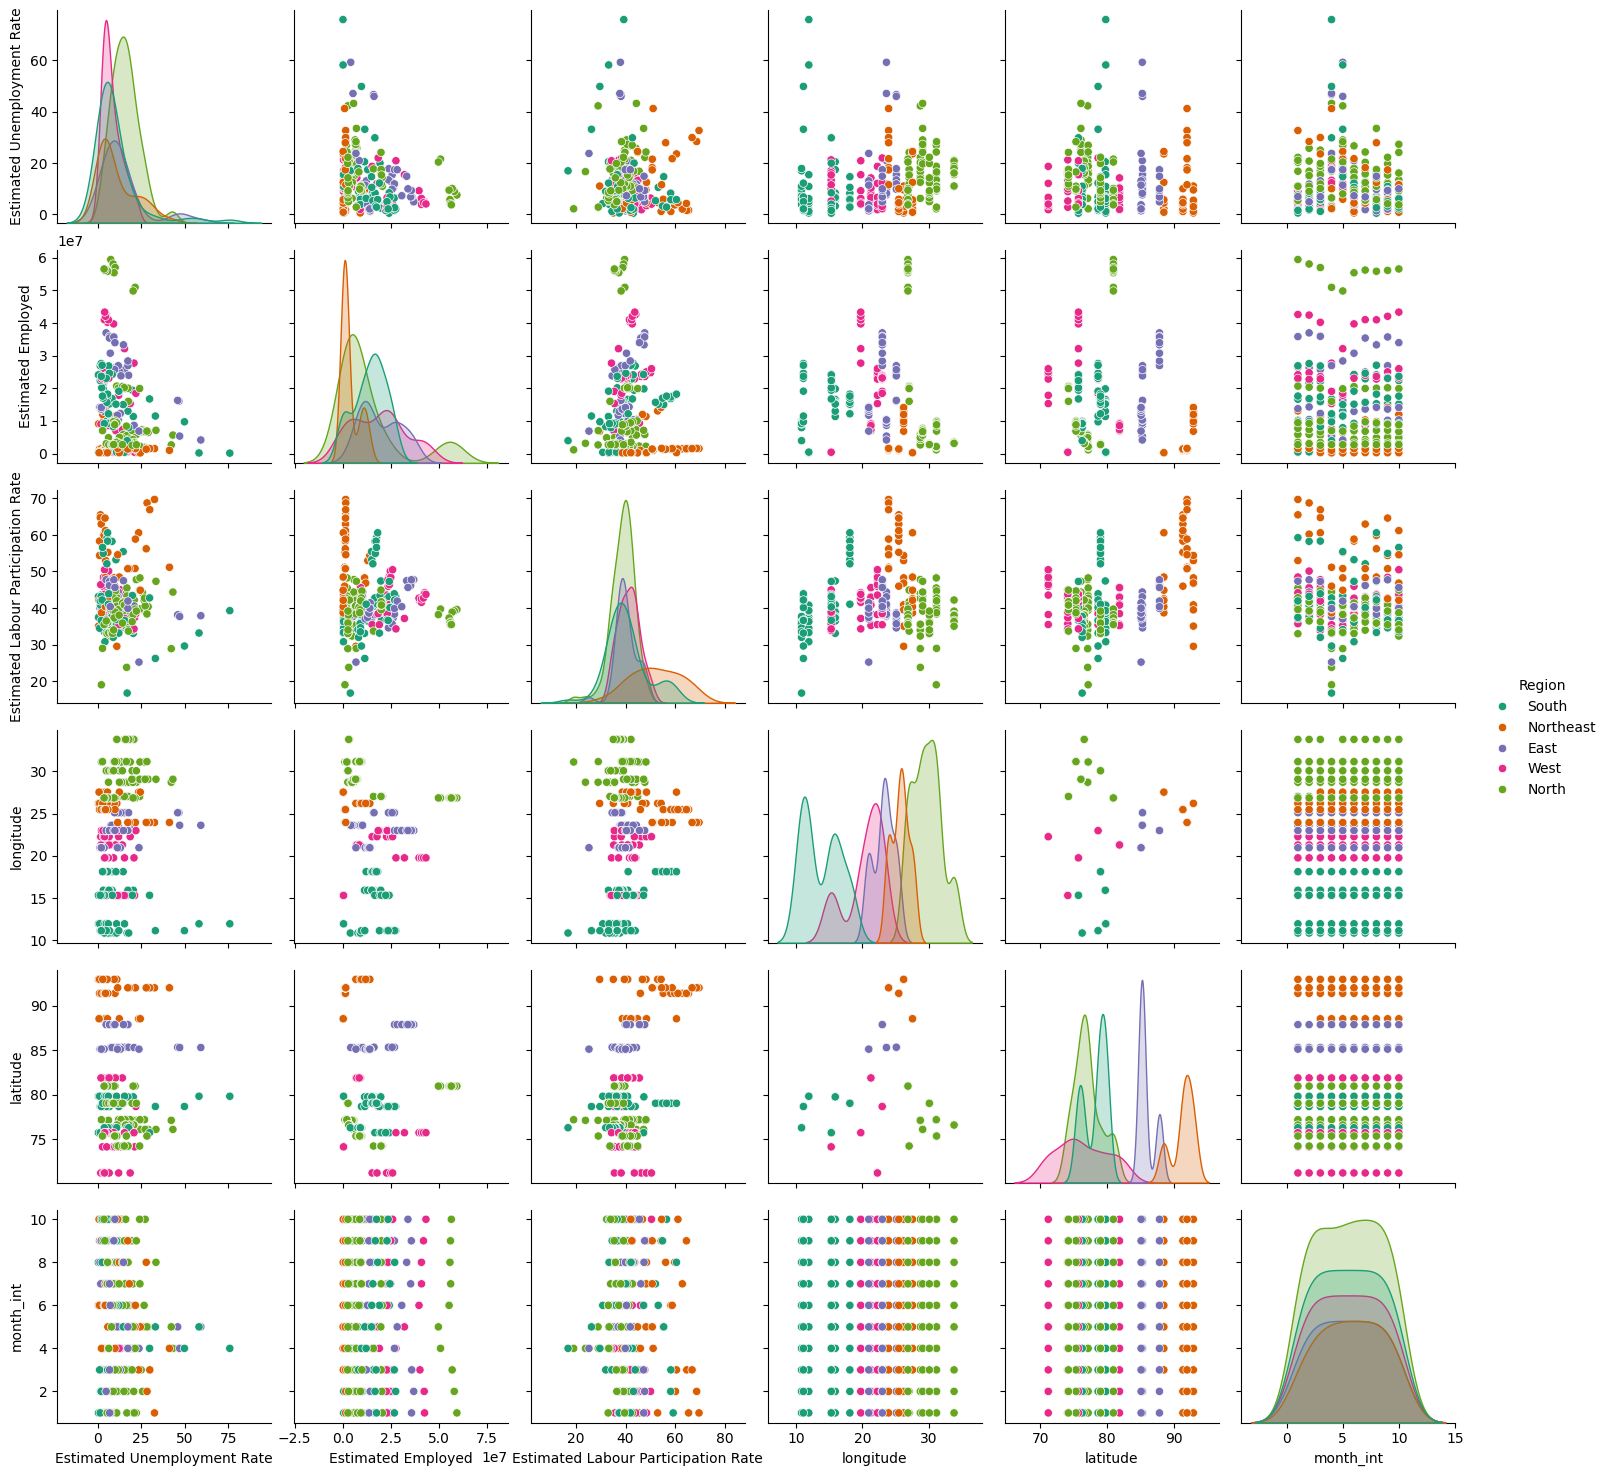

In [75]:
sns.pairplot(df_2020, hue='Region', palette='Dark2')

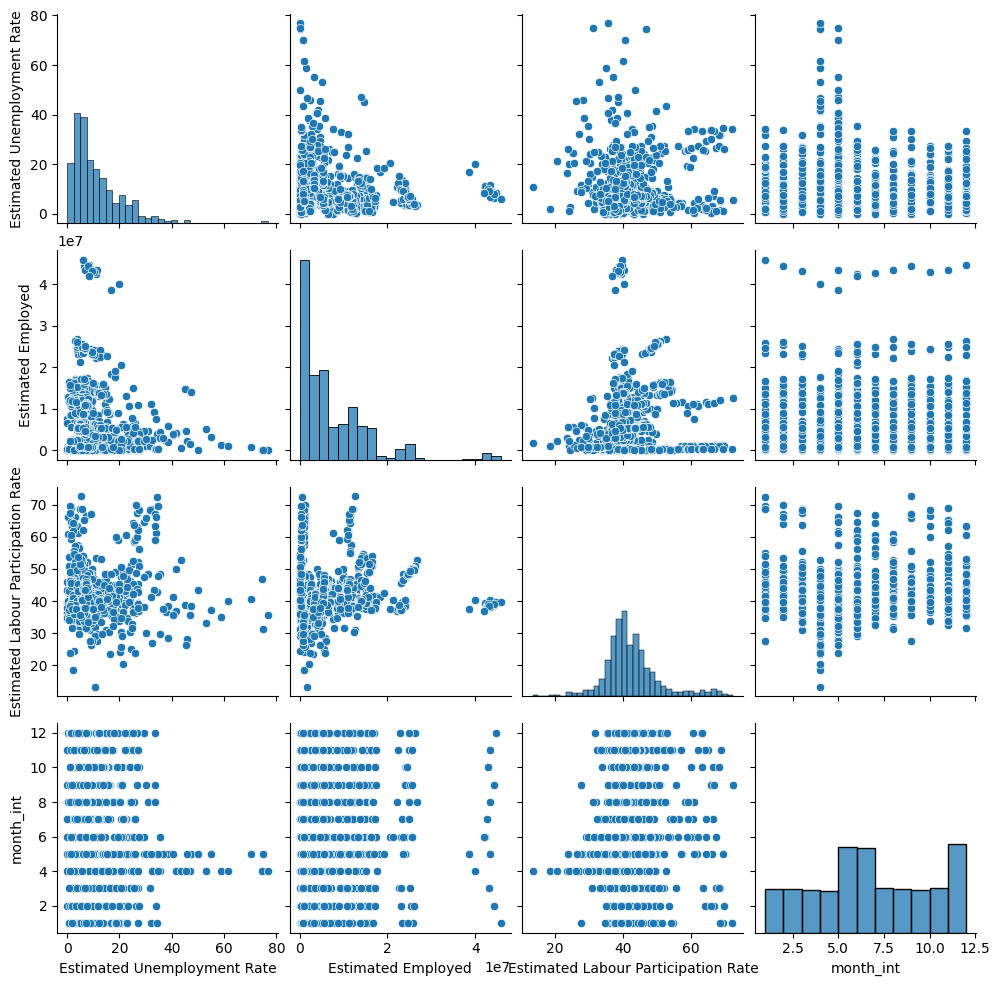

In [76]:
sns.pairplot(df)

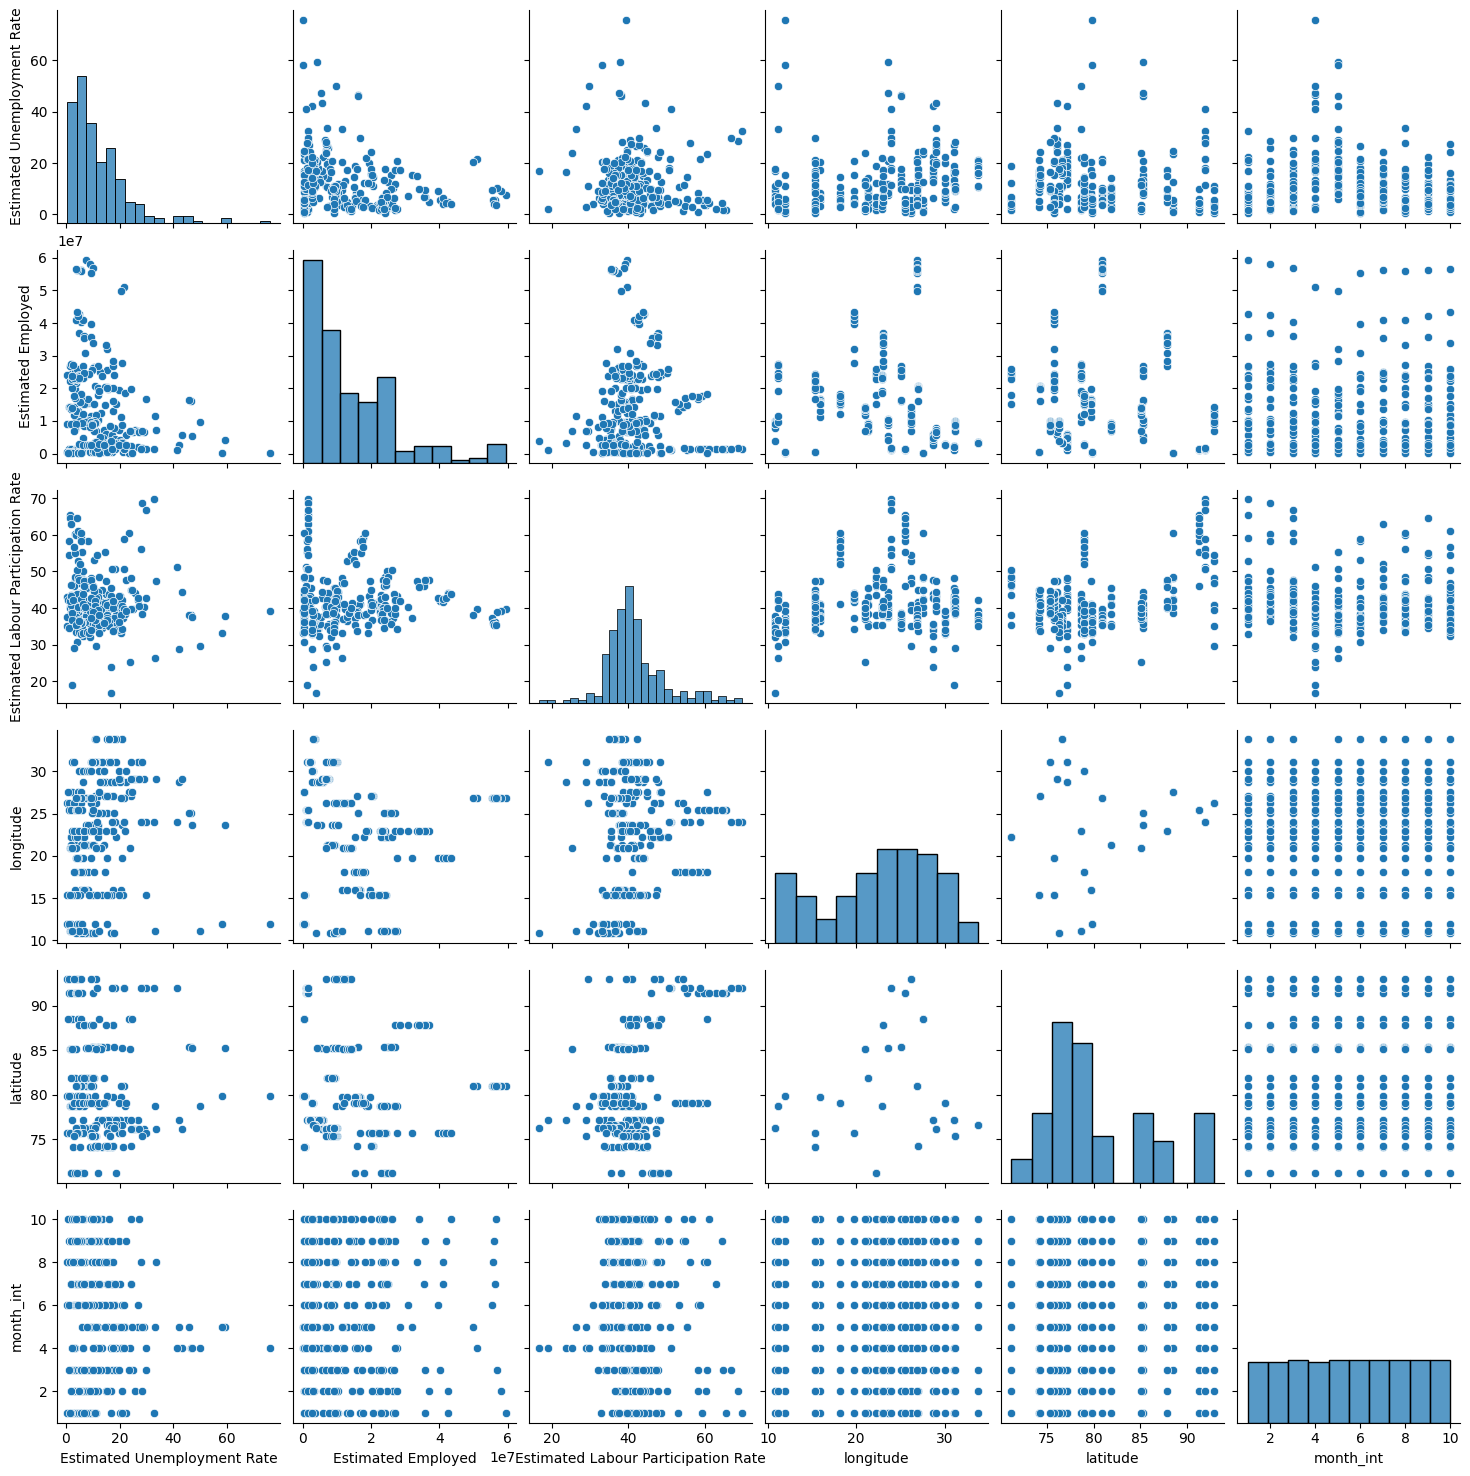

In [77]:
sns.pairplot(df_2020)

In [78]:
df5 = df[['State', 'Area', 'Estimated Unemployment Rate']]
figure = px.sunburst(df5, path=['Area', 'State', ], values='Estimated Unemployment Rate', width= 700, height= 700, color_continuous_scale='RdY1Gn', title='Unemployment Rate in India')
figure.show()

In [79]:
df5 = df_2020[['State', 'Region', 'Estimated Unemployment Rate']]
figure = px.sunburst(df5, path=['Region', 'State', ], values='Estimated Unemployment Rate', width= 700, height= 700, color_continuous_scale='RdY1Gn', title='Unemployment Rate in India')
figure.show()

In [80]:
# Montly wise Unemployment Rate Barplot
fig = px.bar(df, x='State', y='Estimated Unemployment Rate', animation_frame='month', color='State', title='Unemployment Rate(state)' )
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration']=2000
fig.show()

In [81]:
fig = px.bar(df_2020, x='State', y='Estimated Unemployment Rate', animation_frame='month', color='State', title='Unemployment Rate(state)' )
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration']=2000
fig.show()

In [82]:
fig = px.line(df, x='Date', y='Estimated Unemployment Rate', title= 'Unemployment Rate over Time', labels={'Estimated Unemployment Rate':'Unemployment Rate', },template ='plotly_dark')

covid_events = {'Start_date' : '2020-03-01', 'end_date': '2021-06-30', 'event': 'Peak of Pandemic'}
fig.add_shape(type='rect', x0=pd.to_datetime(covid_events['Start_date']), x1= pd.to_datetime(covid_events['end_date']),y0=0, y1=1, fillcolor='red', opacity=0.3, layer='below', line=dict(color='red', width=2))
fig.update_layout(xaxis_title='Date', yaxis_title='Unemployment Rate', legend_title= 'Area')
fig.update_xaxes(type='category')
fig.show()

In [83]:
fig = px.line(df_2020, x='Date', y='Estimated Unemployment Rate', title= 'Unemployment Rate over Time', labels={'Estimated Unemployment Rate':'Unemployment Rate', },template ='plotly_dark')

covid_events = {'Start_date' : '2020-03-01', 'end_date': '2021-06-30', 'event': 'Peak of Pandemic'}
fig.add_shape(type='rect', x0=pd.to_datetime(covid_events['Start_date']), x1= pd.to_datetime(covid_events['end_date']),y0=0, y1=1, fillcolor='red', opacity=0.3, layer='below', line=dict(color='red', width=2))
fig.update_layout(xaxis_title='Date', yaxis_title='Unemployment Rate', legend_title= 'Region')
fig.update_xaxes(type='category')
fig.show()